In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This Function we will used it to remove outliers in data

In [506]:
def remove_ouliers(data,column,remove=False):
    """
        We should pass True to remove only if we are looking in target variable
    """
    q3=data[column].quantile(.75)
    q1=data[column].quantile(.25)
    iqr=q3-q1
    #iqr=iqr+0.5*iqr
    upper = q3 +1.5*iqr
    lower = q1 - 1.5*iqr
    upper_pre=upper
    lower_pre=lower
    while True:
        print("(lower,upper) : ",(lower,upper))
        if remove:
            index_column = data[ data[column] >= upper].index
            data.drop(index_column , inplace=True)
        else:
            data[column]=np.where(data[column]>upper,np.nan,data[column])
        q3=data[column].quantile(.75)
        q1=data[column].quantile(.25)
        iqr=q3-q1
        #print("(lower,upper,IQR) :",(q1,q3,iqr))
        #iqr=iqr+0.5*iqr
        upper = q3 +1.5*iqr
        lower = q1 - 1.5*iqr
        if upper == upper_pre and lower==lower_pre:
            break
        else:
            upper_pre=upper
            lower_pre=lower

    return data

# Data

### Load data

In [507]:
train_data=pd.read_csv("../data/Train.csv")
test_data=pd.read_csv("../data/Test.csv")
print(train_data.shape)

(8523, 12)


### Snapshot of data

In [508]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Informations about data

In [509]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data types in data

In [510]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Data description (statistics)

In [511]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Check null values

In [512]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [513]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Shape of train and test data

In [514]:
print("shape of train data is ",train_data.shape)
print("shape of test data is ",test_data.shape)

shape of train data is  (8523, 12)
shape of test data is  (5681, 11)


# Exploratory Data Analysis

### Columns name 

In [515]:
columns_name=train_data.columns.to_list()
print(columns_name)

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


### Plot Histogram for each feature (column)

#### Item Fat Content

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Count'>

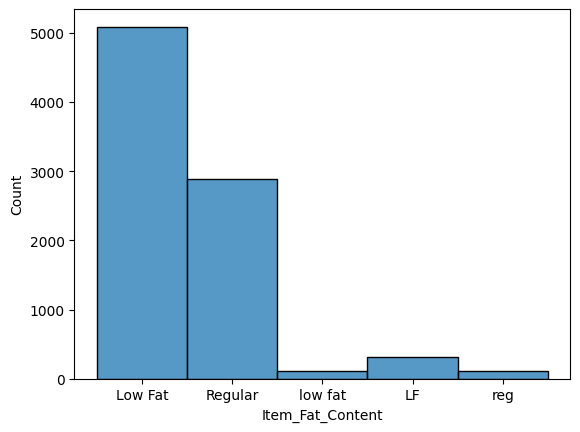

In [516]:

sns.histplot(data=train_data,x="Item_Fat_Content")

##### Mark Well
***
 So as we see, we have problems with names. **_Regular_** is writing also as **_reg_** and the same for **_LF_** and **_Low Fat_** and **_low fat_**, are all equals. We need to fixe this problem First. For that we are going to replace these attributs with the right attribute
 ***


<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Count'>

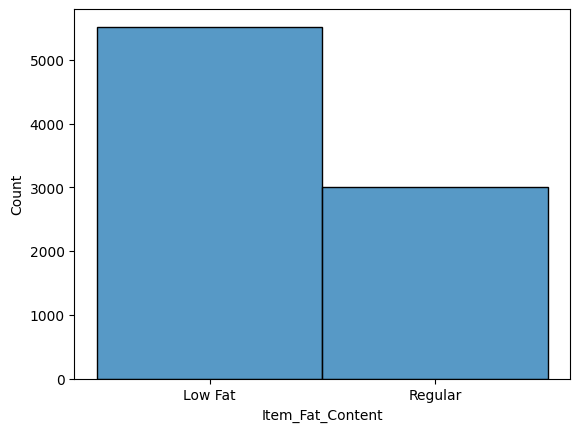

In [517]:
train_data.loc[ train_data["Item_Fat_Content"] == "low fat" , "Item_Fat_Content"] = "Low Fat"
train_data.loc[ train_data["Item_Fat_Content"] == "LF" , "Item_Fat_Content"] = "Low Fat"
train_data.loc[ train_data["Item_Fat_Content"] == "reg" , "Item_Fat_Content"] = "Regular"
sns.histplot(data=train_data,x="Item_Fat_Content")


#### Item Type variable

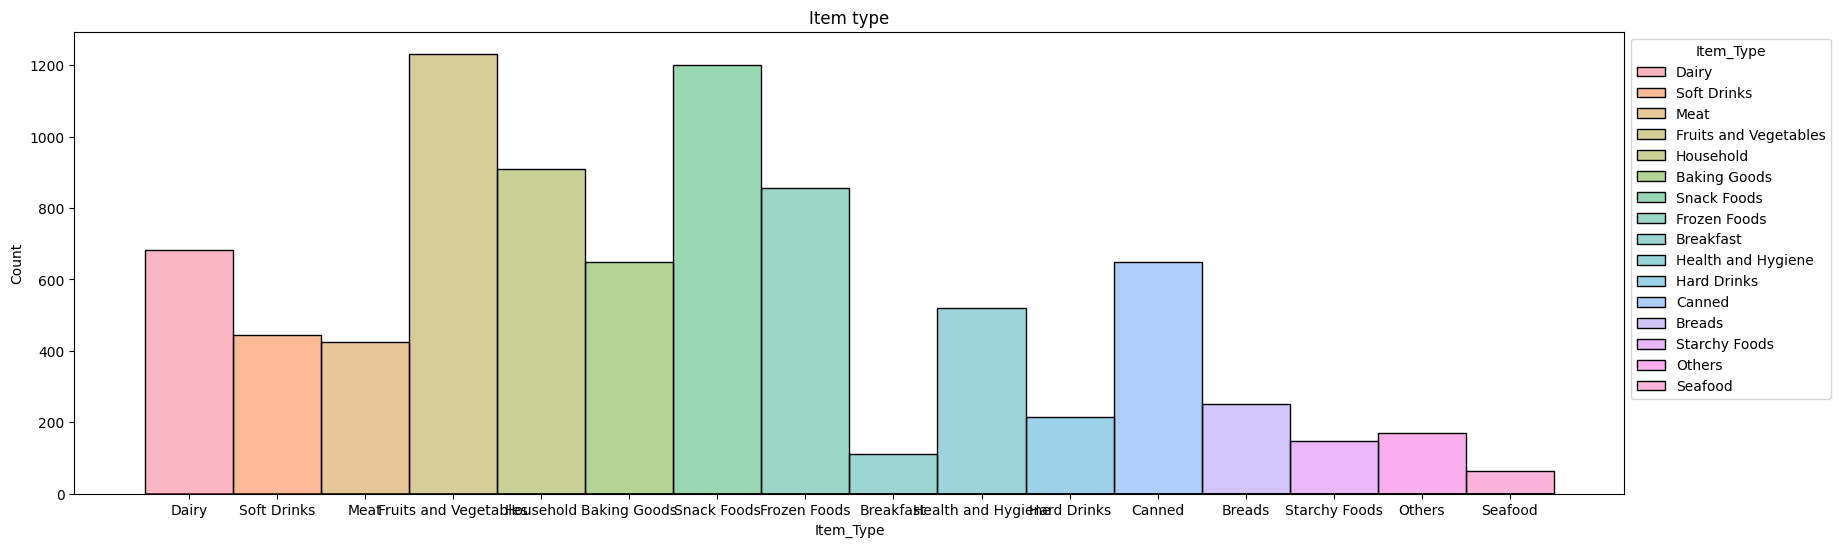

In [518]:
plt.figure(figsize=(20,6))
ax=sns.histplot(data=train_data,x="Item_Type",kde=True,hue="Item_Type")
plt.title('Item type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


##### Mark Well
***
We have the main problem here is the **unbalanced data**.

**Seafood**, **Other**, **Starchy Foods ...** as category is too small in our data which will affect negatively on our model especially if have alot of null values in these variables, because we are going to replace them with the most dominante attributes, otherwise we have to remove this attributes.

***

In [519]:
print(train_data["Item_Type"].unique())
print("-"*40)
print(train_data["Item_Type"].value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


#### Outlet Identifier

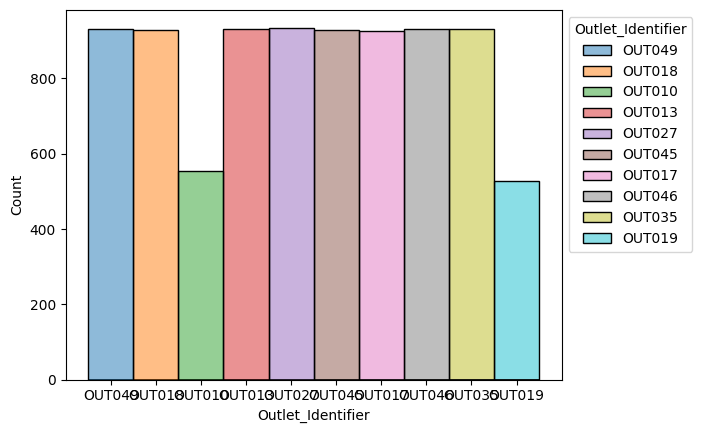

In [520]:
#plt.figure(figsize=(6,3))
ax=sns.histplot(data=train_data,x="Outlet_Identifier",kde=True,hue="Outlet_Identifier")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Outlet Establishment Year

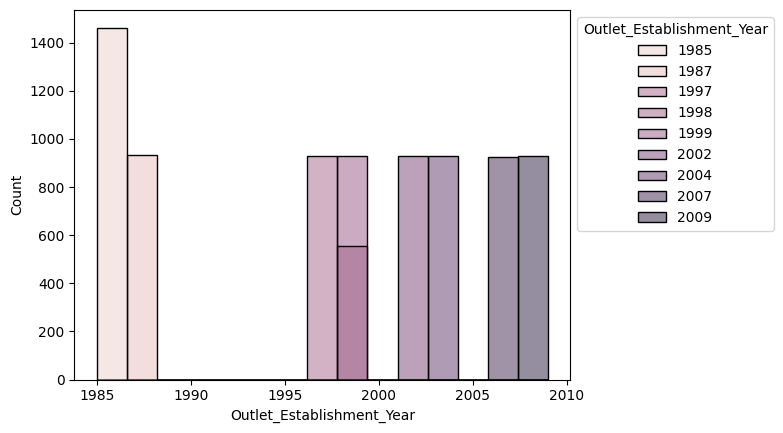

In [521]:
ax=sns.histplot(data=train_data,x="Outlet_Establishment_Year",kde=True,hue="Outlet_Establishment_Year")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Outlet Size

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


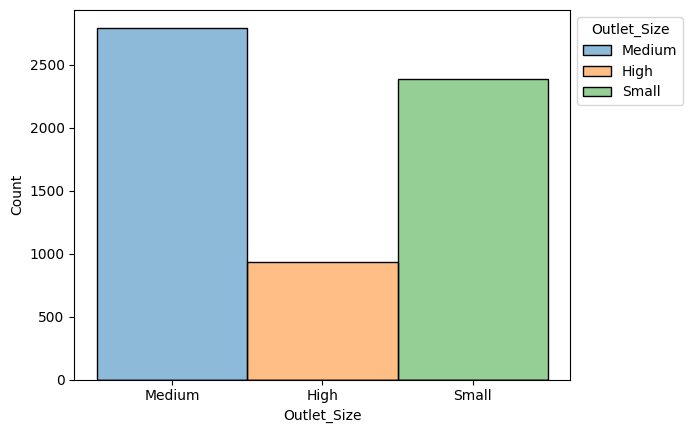

In [522]:

ax=sns.histplot(data=train_data,x="Outlet_Size",hue="Outlet_Size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Size.value_counts())

#### Outlet Location Type

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


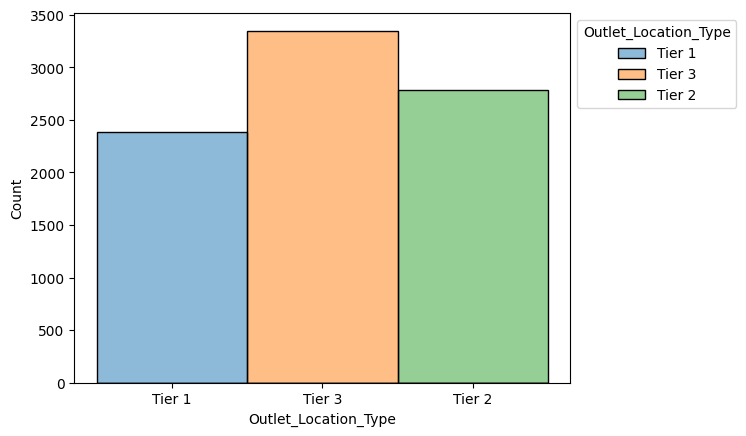

In [523]:

ax=sns.histplot(data=train_data,x="Outlet_Location_Type",hue="Outlet_Location_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Location_Type.value_counts())

#### Outlet Type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


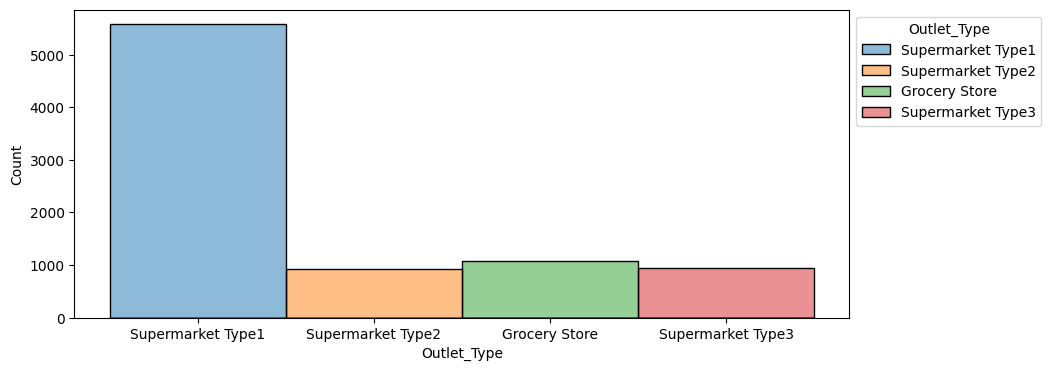

In [524]:
plt.figure(figsize=(10,4))
ax=sns.histplot(data=train_data,x="Outlet_Type",hue="Outlet_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Type.value_counts())

##### Mark Well
***
Here we have also the problem of unbalanced data

We have two solution :

1. remove the that has negatif effect on our model 
2. add more data to get a blanced data

***

### Data Distribution

#### Split data based on columns types

In [525]:
train_data_num=train_data.select_dtypes("float64")
train_data_cat=train_data.select_dtypes("object")
print(train_data_num.head())
print("-----------"*10)
print(train_data_cat.head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0         9.30         0.016047  249.8092          3735.1380
1         5.92         0.019278   48.2692           443.4228
2        17.50         0.016760  141.6180          2097.2700
3        19.20         0.000000  182.0950           732.3800
4         8.93         0.000000   53.8614           994.7052
--------------------------------------------------------------------------------------------------------------
  Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet

#### Histogram for all numerical variables and target variable

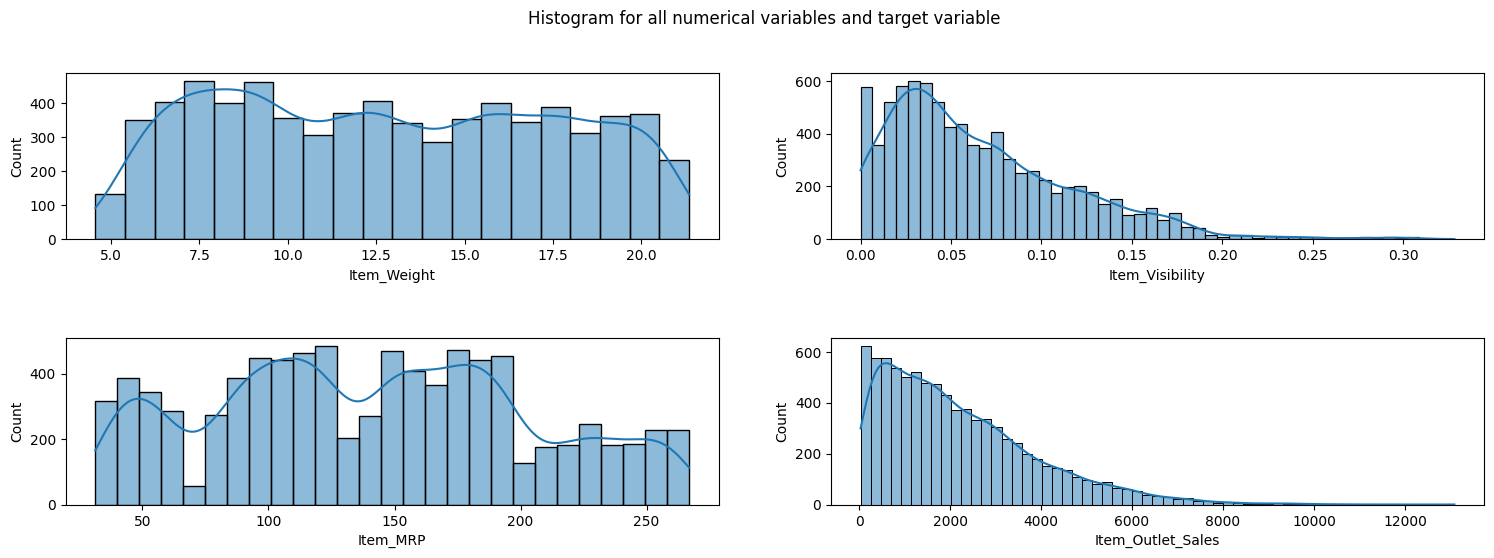

In [526]:

rows=2
cols=2
columns=train_data_num.columns.to_list()
figure, axes = plt.subplots(rows, cols, figsize=(16,6))
plt.tight_layout(pad=5)
figure.suptitle('Histogram for all numerical variables and target variable')
k=0
for i in range(rows):
    for j in range(cols):
        sns.histplot(ax=axes[i,j],data=train_data_num,x=columns[k],kde=True)
        k=k+1
plt.show()

### Outliers detection

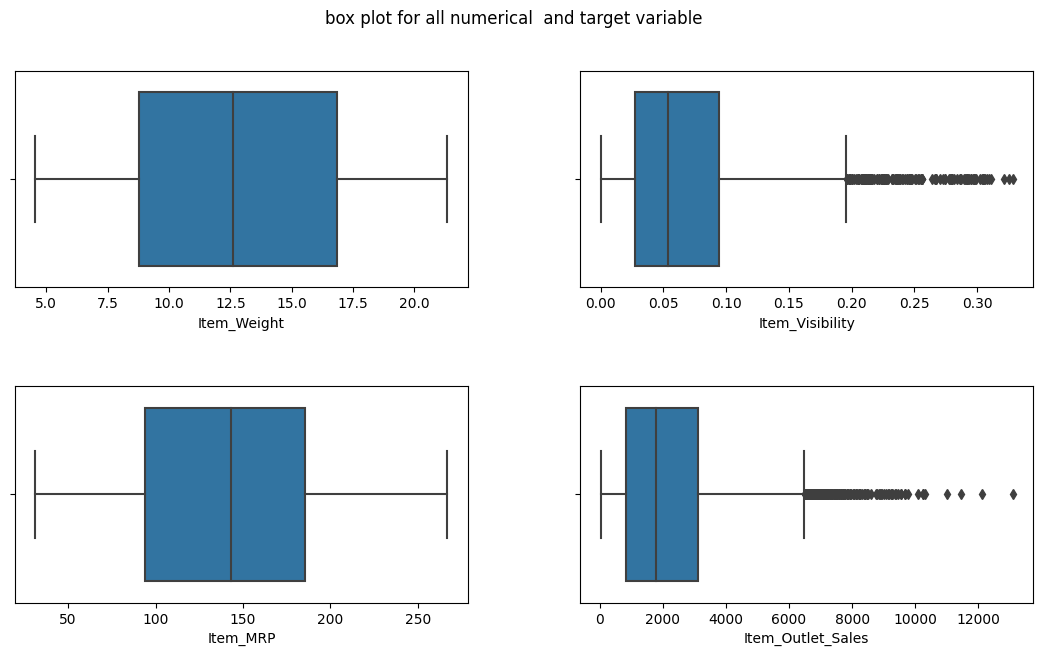

In [527]:

rows=2
cols=2
columns=train_data_num.columns.to_list()
figure, axes = plt.subplots(rows, cols, figsize=(12,7))
plt.tight_layout(pad=5)
figure.suptitle('box plot for all numerical  and target variable')
k=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(ax=axes[i,j],data=train_data_num,x=columns[k])
        k=k+1
plt.show()

##### Mark well
***
We have ouliers in two variables, one is target variable and the second is **Item_Visibilty**.

The solution consists of transform these variables to a normal distribution (like distribution), or remove these outliers.

In this work we are going ot use them both
***

#### Remove Outliers

In [528]:
for col in train_data_num:
    if col=="Item_Outlet_Sales":
        # for that moment we are not going to delete row from target variables
        continue
        train_data_num=remove_ouliers(train_data_num,col,remove=True)
    else:
        train_data_num=remove_ouliers(train_data_num,col)


(lower,upper) :  (-3.340625000000003, 28.964375000000004)
(lower,upper) :  (-0.07440424500000001, 0.195979015)
(lower,upper) :  (-0.071442255, 0.190508941)
(lower,upper) :  (-0.07097827374999999, 0.18967652624999998)
(lower,upper) :  (-0.07096164200000003, 0.18963645600000004)
(lower,upper) :  (-43.8993, 323.3695)


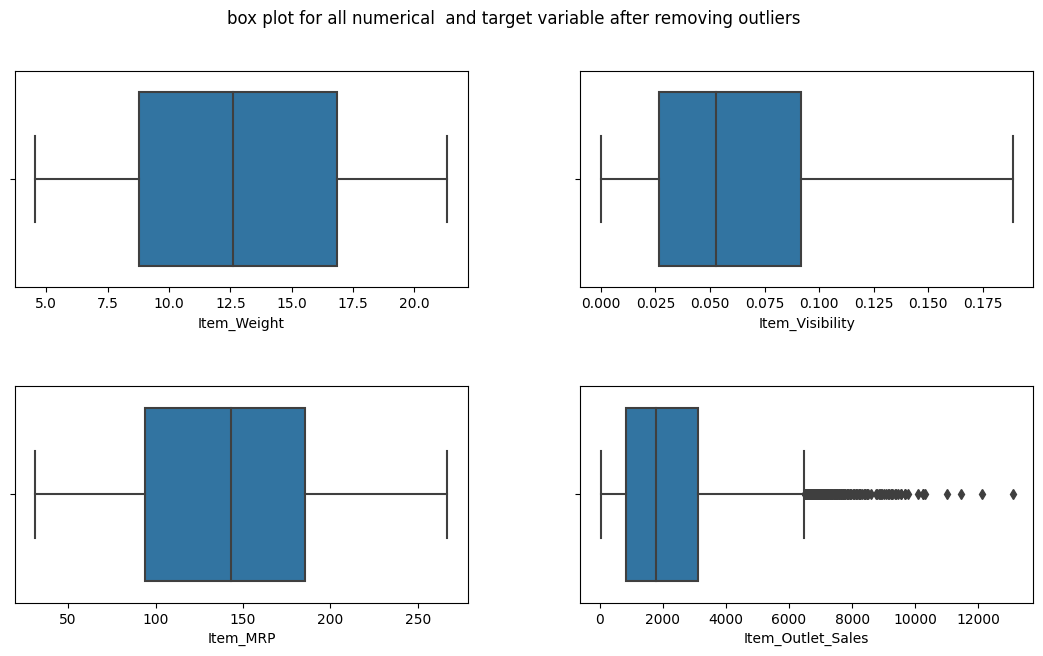

In [529]:
rows=2
cols=2
columns=train_data_num.columns.to_list()
figure, axes = plt.subplots(rows, cols, figsize=(12,7))
plt.tight_layout(pad=5)
figure.suptitle('box plot for all numerical  and target variable after removing outliers')
k=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(ax=axes[i,j],data=train_data_num,x=columns[k])
        k=k+1
plt.show()

### Missing Values verification

#### Nan values in numerical data (type float)

In [530]:
train_data_num.isnull().sum()

Item_Weight          1463
Item_Visibility       161
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

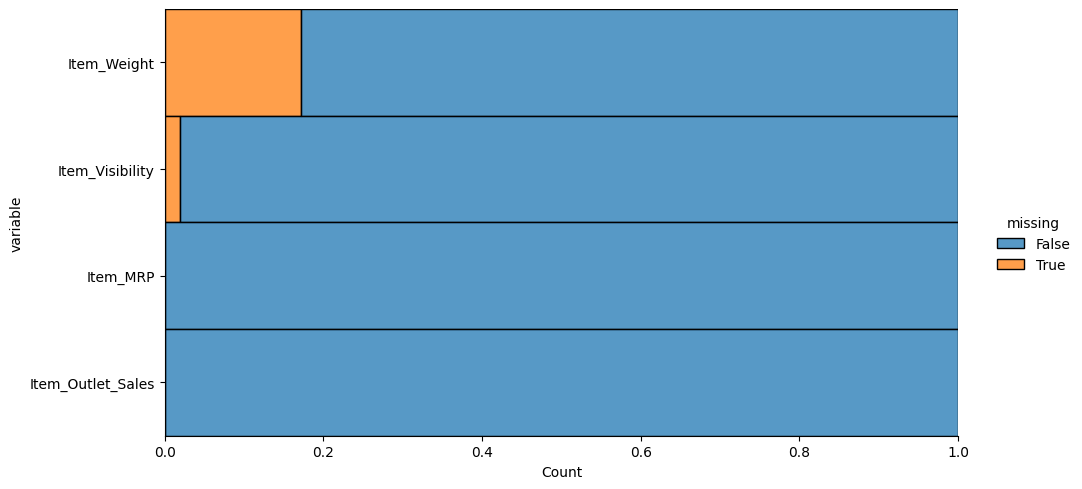

In [531]:

sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

#### Fill Nan Values with Median

In [532]:
train_data_num["Item_Visibility"]=train_data_num["Item_Visibility"].fillna(train_data_num["Item_Visibility"].median())
train_data_num["Item_Weight"]=train_data_num["Item_Weight"].fillna(train_data_num["Item_Weight"].median())

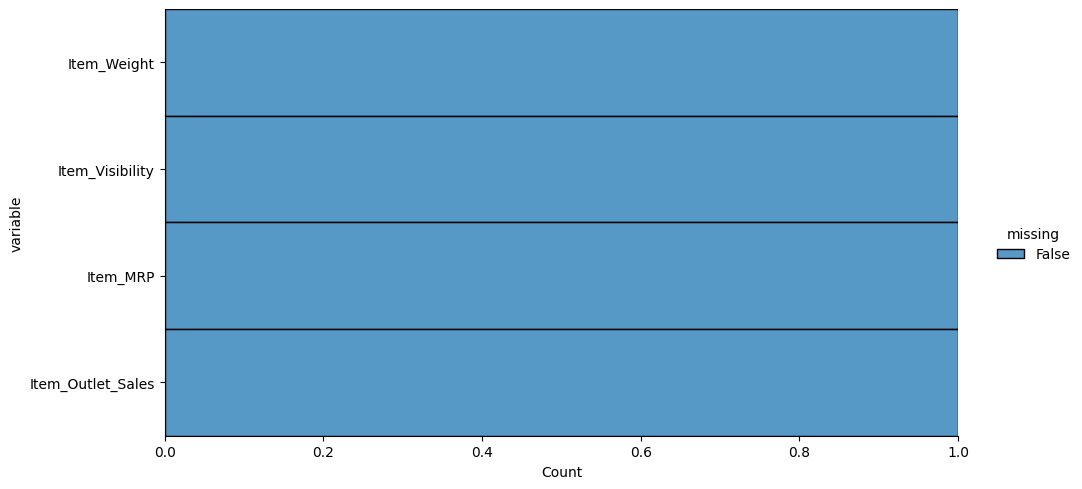

In [533]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

#### Nan values in categorical data

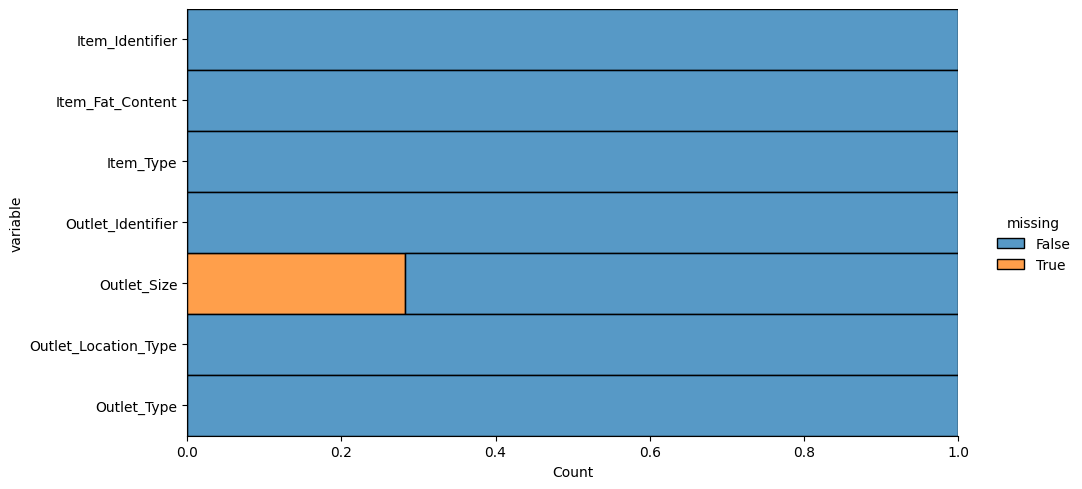

In [534]:
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

#### Fill with values that appear most often

In [535]:
train_data_cat = train_data_cat.fillna(train_data_cat.mode().iloc[0])


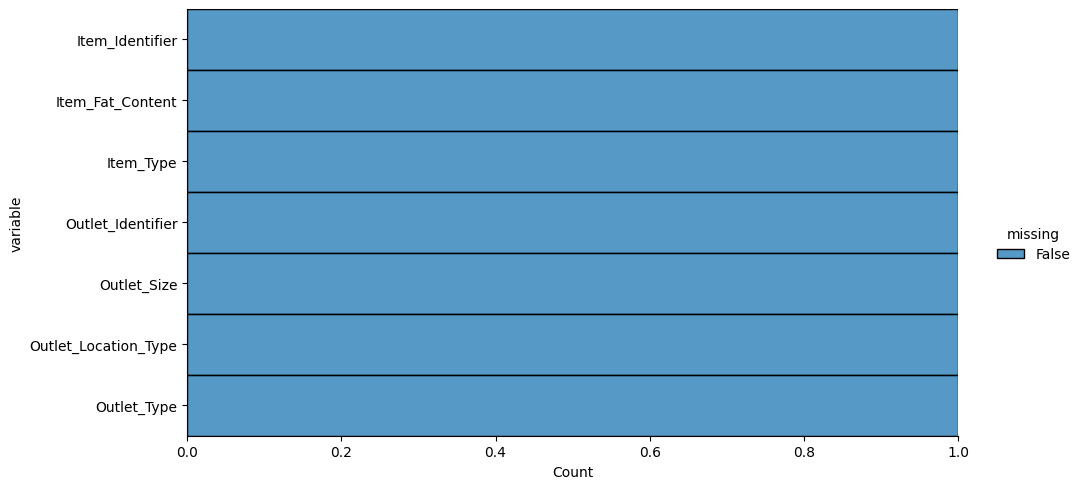

In [536]:

sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

### Correlation matrix  with numerical variables

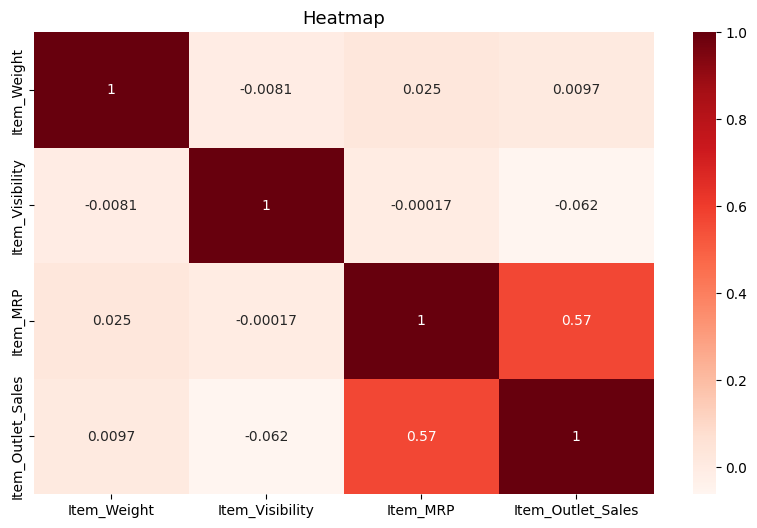

In [537]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data_num.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',
         fontsize=13)
plt.show()

### Categorical encoding

In [538]:
print("shape of data ",train_data_cat.shape)
print("-"*40)
print("columns : ",train_data_cat.columns.to_list()[1:])

shape of data  (8523, 7)
----------------------------------------
columns :  ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [539]:
# we must remove first colum as product identifier
train_data_cata_encoded=pd.get_dummies(train_data_cat.iloc[:,1:], columns=train_data_cat.columns.to_list()[1:])
train_data_cata_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Fusion of dataFrames

In [540]:
train_data_cata_encoded.shape,train_data_num.shape

((8523, 38), (8523, 4))

In [541]:
train_data_cata_encoded.reset_index()
train_data_num.reset_index()
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")

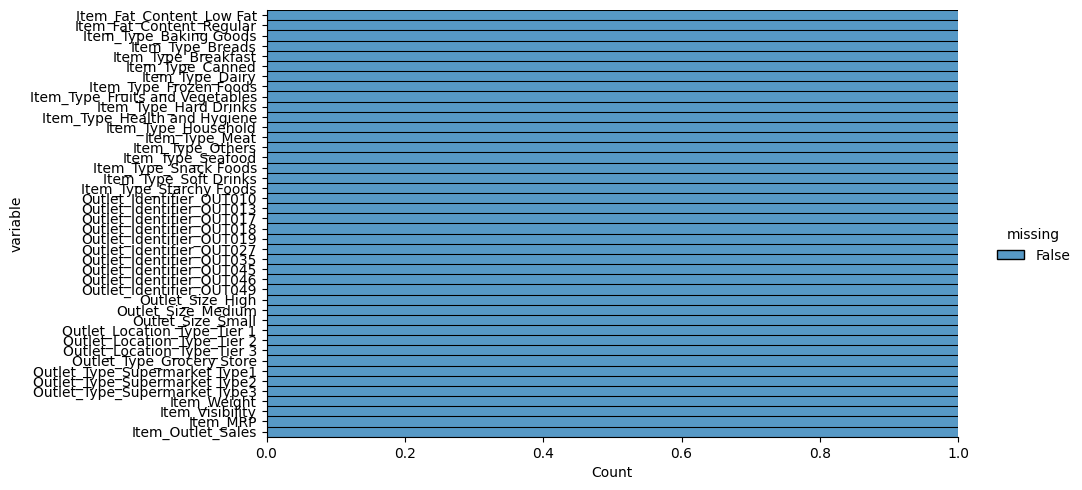

In [542]:
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [543]:
data.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9.30,0.016047,249.8092,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,5.92,0.019278,48.2692,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.50,0.016760,141.6180,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,19.20,0.000000,182.0950,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.93,0.000000,53.8614,994.7052


In [544]:
data.shape

(8523, 42)

## Buid Models

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [546]:

def error_graph(y_test, y_predict):
    errors=metrics.mean_absolute_error(y_predict,y_test,multioutput="raw_values")
    return errors


def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    print('---------------Model Performance--------------')

    print("Score ",model.score(x_test, y_test))
    print("MAE ",metrics.mean_absolute_error(predictions,y_test))
    print("MSE",metrics.mean_squared_error(predictions,y_test))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(predictions,y_test)))
    return metrics.mean_squared_error(predictions,y_test)
    

In [547]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:data.shape[1]-1], data["Item_Outlet_Sales"], test_size=0.3, random_state=200)

### 1. Linear Regression

In [548]:
reg = LinearRegression().fit(X_train, y_train)

In [549]:
print("\nTraining---------------",end="\n")
evaluate(reg,X_train,y_train)

print("\n\nTest---------------------",end="\n")
evaluate(reg,X_test,y_test)


Training---------------
---------------Model Performance--------------
Score  0.5610041329122064
MAE  837.8939940757457
MSE 1274468.3107270973
RMSE  1128.9235185463617


Test---------------------
---------------Model Performance--------------
Score  0.5661816189918984
MAE  832.0984973112957
MSE 1271909.2061534196
RMSE  1127.789522097727


1271909.2061534196

### regularized linear regression

#### Ridge regression

In [550]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

In [551]:
print("\nTraining---------------",end="\n")
evaluate(ridge,X_train,y_train)

print("\n\nTest---------------------",end="\n")
evaluate(ridge,X_test,y_test)


Training---------------
---------------Model Performance--------------
Score  0.5610040789827164
MAE  837.8798288444583
MSE 1274468.467292184
RMSE  1128.923587889005


Test---------------------
---------------Model Performance--------------
Score  0.5661913522466173
MAE  832.084582926618
MSE 1271880.669289089
RMSE  1127.7768703467407


1271880.669289089

#### Lasso regression

In [552]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.4)
lasso.fit(X_train, y_train)


Lasso(alpha=0.4)

In [553]:
print("\nTraining---------------",end="\n")
evaluate(lasso,X_train,y_train)

print("\n\nTest---------------------",end="\n")
evaluate(lasso,X_test,y_test)


Training---------------
---------------Model Performance--------------
Score  0.5609748797481326
MAE  837.9200343219107
MSE 1274553.2368810677
RMSE  1128.9611316963342


Test---------------------
---------------Model Performance--------------
Score  0.5668649115814735
MAE  831.4808846098096
MSE 1269905.8651858068
RMSE  1126.9010006144315


1269905.8651858068

### RandomForest

In [554]:
from sklearn.ensemble import RandomForestRegressor

In [555]:
random_cl = RandomForestRegressor(n_estimators=100)
random_cl=random_cl.fit(X_train,y_train)


In [556]:
print("\nTraining---------------",end="\n")
evaluate(random_cl,X_train,y_train)

print("\n\nTest---------------------",end="\n")
evaluate(random_cl,X_test,y_test)


Training---------------
---------------Model Performance--------------
Score  0.9367299461781747
MAE  298.5627700321824
MSE 183682.09056006468
RMSE  428.5814864877678


Test---------------------
---------------Model Performance--------------
Score  0.5779617825031286
MAE  778.4661109683221
MSE 1237371.023642323
RMSE  1112.3718009920617


1237371.023642323

In [557]:
from sklearn.model_selection import cross_val_score
random_cl = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(random_cl, X_train, y_train, cv=5)
scores

array([0.54031876, 0.48603247, 0.52961821, 0.55062294, 0.57470448])

In [558]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.54 accuracy with a standard deviation of 0.03


### xgboost

In [559]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [560]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 20, seed = 123)
# Fitting the model
xgb_r=xgb_r.fit(X_train, y_train)

In [561]:

print("\nTraining---------------",end="\n")
evaluate(xgb_r,X_train,y_train)

print("\n\nTest---------------------",end="\n")
evaluate(xgb_r,X_test,y_test)


Training---------------
---------------Model Performance--------------
Score  0.6907656738600481
MAE  669.7572271439657
MSE 897751.8441548335
RMSE  947.4976750128907


Test---------------------
---------------Model Performance--------------
Score  0.5890547575313851
MAE  765.9433900541578
MSE 1204847.6044426048
RMSE  1097.6555035358792


1204847.6044426048

## Transormation

In [562]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# for cox box and Yeo-Johnson transform transformation
from sklearn.preprocessing import power_transform

Text(0.5, 1.0, 'Target test variable with box cox transormation')

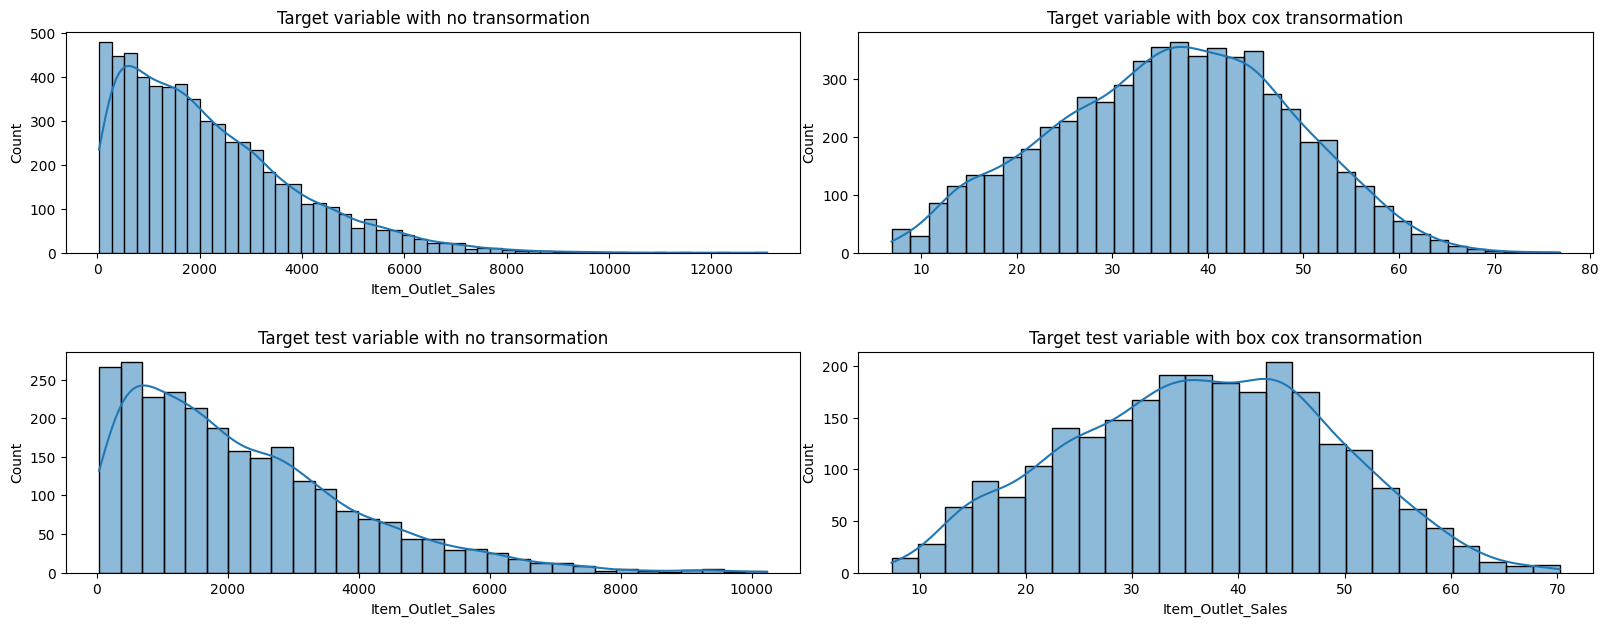

In [563]:

rows=2;cols=2
figure, axes = plt.subplots(rows, cols, figsize=(16,6))
plt.tight_layout(h_pad=5)

y_train_boxcox,best_lmbda= stats.boxcox(y_train)
sns.histplot(ax=axes[0,0],data=y_train, kde=True) 
axes[0,0].set_title("Target variable with no transormation")

sns.histplot(ax=axes[0,1],data=y_train_boxcox, kde=True)  
axes[0,1].set_title("Target variable with box cox transormation")


sns.histplot(ax=axes[1,0],data=y_test, kde=True) 
axes[1,0].set_title("Target test variable with no transormation")

y_test_boxcox= stats.boxcox(y_test,best_lmbda)
sns.histplot(ax=axes[1,1],data=y_test_boxcox, kde=True)  
axes[1,1].set_title("Target test variable with box cox transormation")

In [564]:
random_cl=random_cl.fit(X_train,y_train_boxcox)
print("\nTraining---------------",end="\n")
evaluate(random_cl,X_train,y_train_boxcox)

print("\n\nTest---------------------",end="\n")
evaluate(random_cl,X_test,y_test_boxcox)


Training---------------
---------------Model Performance--------------
Score  0.9519578140642481
MAE  2.0758579091408382
MSE 7.251719436554869
RMSE  2.6929016759909503


Test---------------------
---------------Model Performance--------------
Score  0.6682815303962661
MAE  5.457062734091327
MSE 49.53849801804251
RMSE  7.038359042990241


49.53849801804251

### Power transformer

In [565]:
y_train_boxcox=power_transform(y_train.to_numpy().reshape(-1,1)).flatten()

y_test_boxcox=power_transform(y_test.to_numpy().reshape(-1,1)).flatten()

random_cl=random_cl.fit(X_train,y_train_boxcox)

print("\nTraining---------------",end="\n")
evaluate(random_cl,X_train,y_train_boxcox)

print("\n\nTest---------------------",end="\n")
evaluate(random_cl,X_test,y_test_boxcox)


Training---------------
---------------Model Performance--------------
Score  0.952171061822833
MAE  0.1692136214598227
MSE 0.04782893817716709
RMSE  0.21869828114817705


Test---------------------
---------------Model Performance--------------
Score  0.6693859948479048
MAE  0.4464756420240333
MSE 0.3306140051520952
RMSE  0.5749904391832052


0.3306140051520952

#### Other variables of type numerical (non cotegorical)

In [566]:
X_train_float=X_train.select_dtypes("float64")
columns=X_train_float.columns.to_list()

data_transform=power_transform(X_train_float.to_numpy())
X_train_float_tr=pd.DataFrame(data_transform,columns=columns)

X_train_uint8=X_train.select_dtypes(np.uint8)
X_train_uint8.reset_index(drop=True, inplace=True)

X_train_float_tr.reset_index(drop=True, inplace=True)

objs=[X_train_uint8,X_train_float_tr]
X_train_transform=pd.concat(objs, axis=1, join='outer')

# For X_test

X_test_float=X_test.select_dtypes("float64")
data_transform=power_transform(X_test_float.to_numpy())

X_test_uint8=X_test.select_dtypes(np.uint8)

X_test_float_tr=pd.DataFrame(data_transform,columns=columns)

X_test_uint8.reset_index(drop=True, inplace=True)
X_test_float_tr.reset_index(drop=True, inplace=True)

objs=[X_test_uint8,X_test_float_tr]
X_test_transform=pd.concat(objs, axis=1, join='outer')


#### XGBoost

In [567]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
# Fitting the model
xgb_r=xgb_r.fit(X_train_transform,y_train_boxcox)
print("\nTraining---------------",end="\n")
evaluate(xgb_r,X_train_transform,y_train_boxcox)

print("\n\nTest---------------------",end="\n")
evaluate(xgb_r,X_test_transform,y_test_boxcox)


Training---------------
---------------Model Performance--------------
Score  0.7301093784879331
MAE  0.40080336674624034
MSE 0.2698906215120669
RMSE  0.5195099821101293


Test---------------------
---------------Model Performance--------------
Score  0.6955005122119338
MAE  0.4297577935503689
MSE 0.3044994877880663
RMSE  0.5518147223371865


0.3044994877880663

#### Random Forest

In [568]:
random_cl=random_cl.fit(X_train_transform,y_train_boxcox)

print("\nTraining---------------",end="\n")
evaluate(random_cl,X_train_transform,y_train_boxcox)

print("\n\nTest---------------------",end="\n")
evaluate(random_cl,X_test_transform,y_test_boxcox)


Training---------------
---------------Model Performance--------------
Score  0.9527393025856636
MAE  0.16823908070214136
MSE 0.04726069741433638
RMSE  0.21739525619096747


Test---------------------
---------------Model Performance--------------
Score  0.6736488790778936
MAE  0.4450376851967581
MSE 0.3263511209221064
RMSE  0.5712714949322313


0.3263511209221064

### Distribution of train data of type float

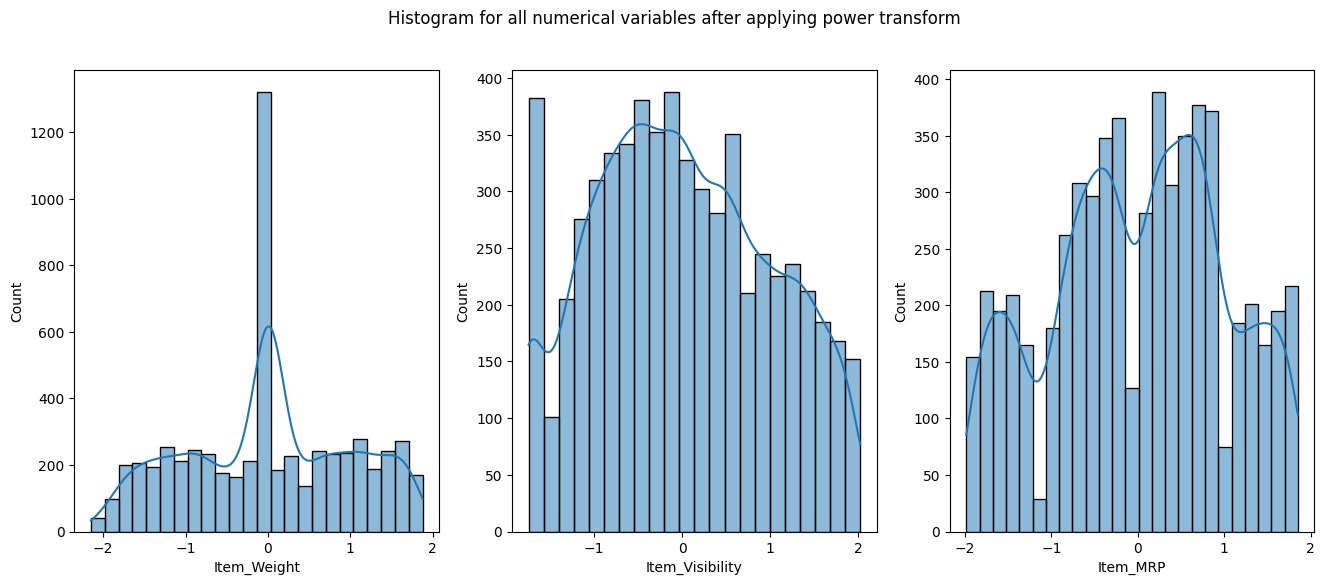

In [569]:

rows=1
cols=3
columns=X_train_transform.select_dtypes("float64").columns.to_list()
columns
figure, axes = plt.subplots(rows, cols, figsize=(16,6))
figure.suptitle('Histogram for all numerical variables after applying power transform')
k=0
for i in range(rows):
    for j in range(cols):
        sns.histplot(ax=axes[j],data=X_train_transform,x=columns[j],kde=True)
plt.show()

## Feature Enginnering

### Find the best Estimator for PCA

In [ ]:
from sklearn.decomposition import PCA
result=[]
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
for i in range(5,41):
    pca = PCA(n_components=i)
    pca.fit(X_train_transform)
    X_train_transform_pca=pca.fit_transform(X_train_transform,y_train_boxcox)
    X_test_transform_pca=pca.transform(X_test_transform)
    xgb_r=xgb_r.fit(X_train_transform_pca,y_train_boxcox)
    result.append(evaluate(xgb_r,X_test_transform_pca,y_test_boxcox))


##### Mark Well
***
Here we find the best result for n_components is 7

To execute the above cell take at leat 10 min om my computer (i5-5th generation)
****

Text(0, 0.5, 'Mean Absolute Error ')

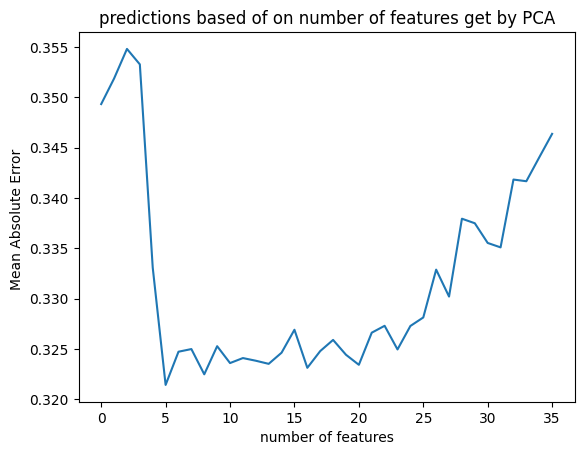

In [571]:
plt.plot(range(len(result)),result)
plt.title("predictions based of on number of features get by PCA")
plt.xlabel("number of features")
plt.ylabel("Mean Absolute Error ")

#### Apply PCA

<span style="color:red">

##### Mark Well
Please use the result list to find the best estimatorn (np.argmin(result))

we find it so we are not going to repeat the execution (lost of time)

More than that w must take a lot to the graph
</span>

In [572]:
np.argmin(result)

5

In [573]:
# we take 20 based on the graph 9 more stable)
pca = PCA(n_components=20)
pca.fit(X_train_transform)
X_train_transform_pca=pca.fit_transform(X_train_transform,y_train_boxcox)
X_test_transform_pca=pca.transform(X_test_transform)

#### XGBoost with PCA

In [574]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
# Fitting the model
xgb_r=xgb_r.fit(X_train_transform_pca,y_train_boxcox)
print("\nTraining---------------",end="\n")
evaluate(xgb_r,X_train_transform_pca,y_train_boxcox)

print("\n\nTest---------------------",end="\n")
evaluate(xgb_r,X_test_transform_pca,y_test_boxcox)


Training---------------
---------------Model Performance--------------
Score  0.7495994353126728
MAE  0.3859254771515629
MSE 0.2504005646873272
RMSE  0.5004004043636727


Test---------------------
---------------Model Performance--------------
Score  0.6730995475547408
MAE  0.4479646988035649
MSE 0.3269004524452593
RMSE  0.5717520900226419


0.3269004524452593

# Testing

In [584]:
X_test=pd.read_csv("../data/cleaned_test_data.csv",index_col=0)
X_test.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,20.750,0.007565,107.8622
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,8.300,0.038428,87.3198
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,14.600,0.099575,241.7538
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,7.315,0.015388,155.0340
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,12.500,0.118599,234.2300


In [588]:
X_test_float=X_test.select_dtypes("float64")
columns=X_test_float.columns.to_list()

data_transform=power_transform(X_test_float.to_numpy())

X_test_uint8=X_test.select_dtypes(np.int64)

X_test_float_tr=pd.DataFrame(data_transform,columns=columns)

X_test_uint8.reset_index(drop=True, inplace=True)
X_test_float_tr.reset_index(drop=True, inplace=True)

objs=[X_test_uint8,X_test_float_tr]
X_test_transform=pd.concat(objs, axis=1, join='outer')
X_test_transform.head()


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1.766675,-1.468141,-0.472017
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,-1.028242,-0.436133,-0.835998
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.503383,0.965889,1.525375
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,-1.302264,-1.180095,0.290835
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0.026944,1.278412,1.424528


In [589]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
# Fitting the model
xgb_r=xgb_r.fit(X_train_transform,y_train_boxcox)
xgb_r.predict(X_test_transform)

array([-0.09699826, -0.24122758, -1.1019839 , ..., -0.04577446,
        0.9341393 , -0.29983738], dtype=float32)

# Deep Neural Network

In [324]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import datetime

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train_transform_pca.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss="mean_absolute_error", optimizer='adam', metrics=['mean_absolute_error'])
#NN_model.summary()

Epoch 1/20
187/187 [==============================] - 2s 13ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - val_loss: 0.4414 - val_mean_absolute_error: 0.4414
Epoch 2/20
187/187 [==============================] - 2s 13ms/step - loss: 0.4308 - mean_absolute_error: 0.4308 - val_loss: 0.4624 - val_mean_absolute_error: 0.4624
Epoch 3/20
187/187 [==============================] - 2s 12ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - val_loss: 0.4432 - val_mean_absolute_error: 0.4432
Epoch 4/20
187/187 [==============================] - 2s 12ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - val_loss: 0.4415 - val_mean_absolute_error: 0.4415
Epoch 5/20
187/187 [==============================] - 2s 11ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - val_loss: 0.4411 - val_mean_absolute_error: 0.4411
Epoch 6/20
187/187 [==============================] - 2s 11ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - val_loss: 0.4391 - val_mean_absolute_error: 0.4391
Epoch 7/20

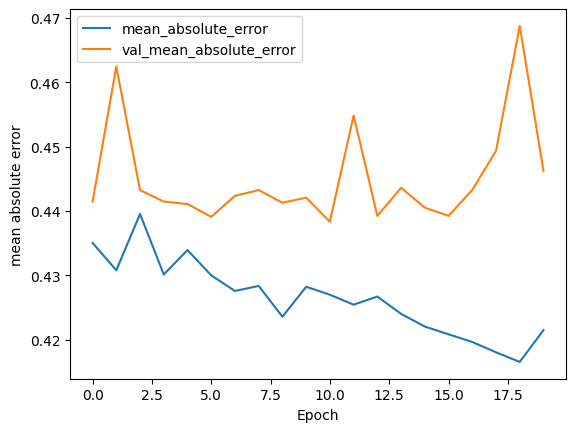

In [353]:
history=NN_model.fit(X_train_transform_pca, y_train_boxcox, epochs=20, batch_size=32, validation_data=(X_test_transform_pca,y_test_boxcox))
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("mean absolute error")
plt.plot(history.epoch,np.array(history.history["mean_absolute_error"]),label="mean_absolute_error")
plt.plot(history.epoch,np.array(history.history["val_mean_absolute_error"]),label="val_mean_absolute_error")
plt.legend()


In [352]:
predictions = NN_model.predict(X_test_transform_pca)
r2_score(y_train_boxcox,predictions)

80/80 [==============================] - 0s 5ms/step


ValueError: Found input variables with inconsistent numbers of samples: [5966, 2557]